# Seattle AirBnB data analysis

### Table of Contents
- Introduction
- Business understanding
- Data understanding
- Data prepration
- Modeling
- Evaluation
- Conclusion

### Introduction
> Airbnb is an online marketplace which lets people rent out their properties or spare rooms to guests. Since the company launched in 2009, it’s grown from helping 21,000 guests a year find a place to stay to helping six million a year go on holiday, and currently lists a staggering 800,000 properties in 34,000 cities across 90 different countries. <br><br>
In this project we will analyze the homestay dataset from Seattle, WA (USA)

### Business understanding
> Through this analysis we will try to answer the following questions:
 1. Which is the most popular neighborhood in Seattle? And similarly which is the least popular area in Seattle? What can we tell by looking at their monthly pricing trends?
 2. How does price fluctuate over time? Is there any seasonal effect over pricing?
 3. What are the main amenities? There will be many in the catalog but we will try to find the main profiles
 4. What are the different features that decide the pricing?
 5. Can we classify the properties? It would be nice to see what features bring the properties together and what separates them

### Data understanding
> This section we will try to understand the data we have in our folder. We have the following 3 files to work on:
 1. Calendar
 2. Listings
 3. Reviews
 

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Pre Processing Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, Imputer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score


#Different models input statements
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm

#To print the best parameters
from pprint import pprint

#Model tuning libraries
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

#Model evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from time import time


%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, Imputer

In [323]:
calendar = pd.read_csv('./Seattle data/calendar.csv')
listings = pd.read_csv('./Seattle data/listings.csv')
reviews = pd.read_csv('./Seattle data/reviews.csv')

In [324]:
print("calendar" + str(calendar.shape))
print("listings" + str(listings.shape))
print("reviews" + str(reviews.shape))

calendar(1393570, 4)
listings(3818, 92)
reviews(84849, 6)


In [325]:
calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [326]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [327]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [328]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [329]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [330]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [415]:
print("The dates in calendar dataset is from " + str(calendar.date.min()) + " to " + str(calendar.date.max()))
print("The dates in reviews dataset is from " + str(reviews.date.min()) + " to " + str(reviews.date.max()))

The dates in calendar dataset is from 2016-01-04 to 2017-01-02
The dates in reviews dataset is from 2009-06-07 to 2016-01-03


#### Observations

> We have observed the following about the datasets
 1. Calendar - This gives us the information whether the property is available for a certain period or not; If it is available the cost involved in blocking the property is also mentioned
 2. Listings - This dataset tells us about the property. It will also provide information about owner's credibility, property quality, occupancy, etc.
 3. Reviews - This dataset provides reviews that users gave over time
 
 - Out of 84,849 records in Reviews dataset only 18 records doesn't have any comments
 - Out of 1,393,570 records in the Calendar dataset 934,542 (67.1%) records have non null price, ie. 459,028 (32.9%) have null records in comments column. In other words listings are available for around 67% of the times
 - Reviews dataset is available from Jun'09 to Jan'16 (~6.5 years) while Calendar dataset is available from Jan'16 to Jan'17 (12 months). However, there isn't any common dates between the two datasets
 - Because of the above reason we will rely on the listings dataset for our major part of the analysis

### Data preparation
>This section will be used to prepare the data for further analysis.

Feature selection of listing datasets i.e. I will be manually checking the column names and then decide on which one to choose. This dataset will be further used in the analysis

In [332]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [333]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

>On checking the names of columns I decide to keep the following columns for my analysis. Explanation of each will be provided in subsequent steps

'space','experiences_offered','neighborhood_overview','neighbourhood_group_cleansed','latitude','longitude',
'property_type','beds','bed_type','square_feet','weekly_price','monthly_price','host_response_time',
'host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','room_type',
'accommodates','bathrooms','bedrooms','amenities','price','minimum_nights','cancellation_policy',
'require_guest_profile_picture','require_guest_phone_verification','id','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'

In [334]:
listings1 = listings[['space','experiences_offered','neighborhood_overview','neighbourhood_group_cleansed',
                      'latitude','longitude','property_type','beds','bed_type','square_feet','weekly_price',
                      'monthly_price','host_response_time','host_response_rate','host_acceptance_rate',
                      'host_is_superhost','neighbourhood_cleansed','room_type','accommodates','bathrooms',
                      'bedrooms','amenities','price','minimum_nights','cancellation_policy',
                      'require_guest_profile_picture','require_guest_phone_verification','id','review_scores_rating',
                      'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                      'review_scores_communication','review_scores_location','review_scores_value']]
listings1.shape

(3818, 35)

On closer look at the data, I found that few columns selected earlier will not be required. Such as <br>
- weekly_price and monthly_price not required as there is already a price column
- square feet has too many nulls
- Among accommodates, bedrooms and beds I choose accommodates and bedroom. Choosing bed too will be redundant
- neighborhood_overview, space, experiences_offered has text in it. I will do not be doing text analysis so better to ignore it

Deleting the above mentioned columns in the cell below

In [335]:
listings1.drop(['weekly_price', 'monthly_price', 'space', 'experiences_offered', 
                'neighborhood_overview', 'beds', 'square_feet'], axis = 1, inplace = True) 

listings1.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(3818, 28)

Checking missing values by column and then deleting them on inference

In [336]:
#Count NaNs after feature selection
nanCount = listings1.isnull().sum().reset_index()

nanCount.columns = ['index', 'count']
nanCount = nanCount.set_index('index')
nanCount

,count
index,
neighbourhood_group_cleansed,0
latitude,0
longitude,0
property_type,1
bed_type,0
host_response_time,523
host_response_rate,523
host_acceptance_rate,773
host_is_superhost,2


In [337]:
# Calculate percentage of NaN for each column
nanCount['Total'] = listings1.shape[0] 
nanCount['percent'] = np.round(nanCount['count'] * 100 / nanCount['Total'], 2)

# Sort by percentage
nanCount.sort_values(by='percent', ascending=False, inplace=True)

nanCount.head(100)

,count,Total,percent
index,,,
host_acceptance_rate,773,3818,20.25
review_scores_checkin,658,3818,17.23
review_scores_accuracy,658,3818,17.23
review_scores_value,656,3818,17.18
review_scores_location,655,3818,17.16
review_scores_cleanliness,653,3818,17.10
review_scores_communication,651,3818,17.05
review_scores_rating,647,3818,16.95
host_response_time,523,3818,13.70


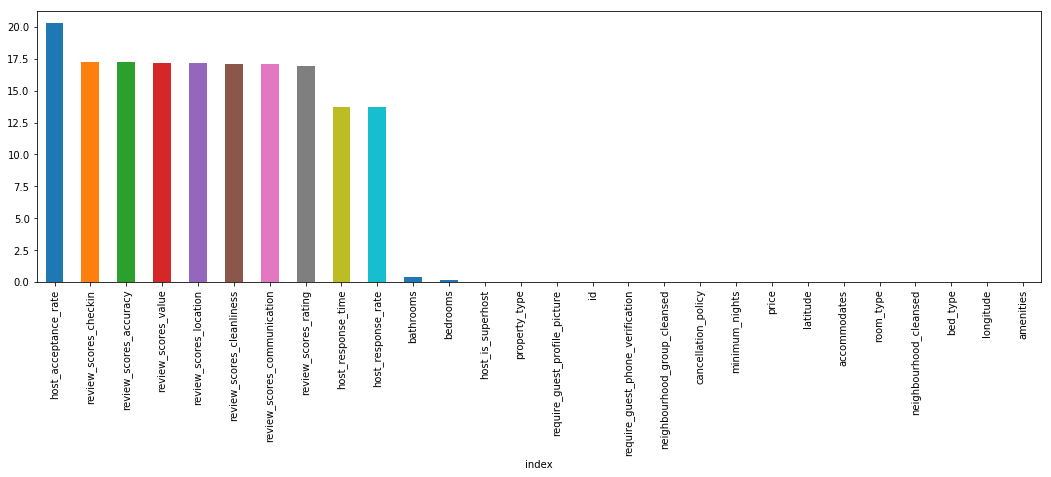

In [338]:
# Investigate patterns in the amount of missing data in each column.
nanCount.percent.plot.bar(figsize=(18, 5));

Let's check few columns which have high number of NaNs

In [339]:
listings_temp1 = listings1.groupby('host_acceptance_rate').nunique()
listings_temp1

,neighbourhood_group_cleansed,latitude,longitude,property_type,bed_type,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
host_acceptance_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0%,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100%,17,3044,3044,16,5,4,45,1,2,87,3,15,12,8,2616,246,17,3,2,2,3044,42,7,7,8,8,6,7


In [340]:
listings_temp2 = listings1.groupby('review_scores_checkin').nunique()
listings_temp2

,neighbourhood_group_cleansed,latitude,longitude,property_type,bed_type,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_checkin,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,2,2,2,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,1,1,2,2,2,2,1,1,2,2
4.0,3,5,5,2,1,3,4,1,1,5,3,4,3,3,5,5,5,2,1,1,5,3,3,3,1,3,3,3
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.0,6,9,9,3,1,3,4,1,1,9,2,5,1,2,9,9,3,3,2,2,9,4,3,5,1,5,3,4
7.0,6,12,12,3,1,4,8,1,1,8,2,6,2,3,12,9,4,3,2,2,12,9,4,4,1,4,4,4
8.0,12,64,64,4,4,4,20,1,2,30,3,10,7,6,64,44,6,3,2,2,64,25,7,7,1,6,5,6
9.0,16,423,423,9,4,4,32,1,2,72,3,12,11,6,391,129,10,3,2,2,423,31,5,7,1,4,5,6
10.0,17,2644,2644,15,5,4,40,2,2,86,3,14,12,8,2332,248,17,3,2,2,2644,29,6,7,1,4,6,6


After checking few columns with high NaNs, I think I should replace them with 0 or mean (either of them should work fine as not many records are having missing values). I will go ahead with feeding 0 to replace missing values here. I hope it doesn't make much of a difference

In [341]:
listings2 = listings1.replace(np.nan, 0)
listings2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
neighbourhood_group_cleansed        3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3818 non-null object
bed_type                            3818 non-null object
host_response_time                  3818 non-null object
host_response_rate                  3818 non-null object
host_acceptance_rate                3818 non-null object
host_is_superhost                   3818 non-null object
neighbourhood_cleansed              3818 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3818 non-null float64
bedrooms                            3818 non-null float64
amenities                           3818 non-null object
price                              

In [342]:
# New dataframe for review scoring and an average overall score (which is in the range of 1-10)
avg_scores = listings2[[u'id', u'neighbourhood_cleansed', u'review_scores_accuracy',u'review_scores_cleanliness',
                        u'review_scores_checkin', u'review_scores_communication',
                        u'review_scores_location', u'review_scores_value', u'review_scores_rating']]

avg_scores['Overall_score'] = (avg_scores['review_scores_cleanliness'] + avg_scores['review_scores_cleanliness'] + 
                          avg_scores['review_scores_checkin'] + avg_scores['review_scores_communication'] + 
                          avg_scores['review_scores_location'] + avg_scores['review_scores_value'] + 
                          avg_scores['review_scores_accuracy'])/7
avg_scores.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,neighbourhood_cleansed,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,Overall_score
0,241032,West Queen Anne,10.0,10.0,10.0,10.0,9.0,10.0,95.0,9.857143
1,953595,West Queen Anne,10.0,10.0,10.0,10.0,10.0,10.0,96.0,10.000000
2,3308979,West Queen Anne,10.0,10.0,10.0,10.0,10.0,10.0,97.0,10.000000
3,7421966,West Queen Anne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,278830,West Queen Anne,9.0,9.0,10.0,10.0,9.0,9.0,92.0,9.285714
5,5956968,West Queen Anne,10.0,10.0,10.0,10.0,10.0,10.0,95.0,10.000000
6,1909058,West Queen Anne,10.0,10.0,10.0,10.0,10.0,10.0,99.0,10.000000
7,856550,West Queen Anne,10.0,10.0,10.0,10.0,9.0,10.0,97.0,9.857143
8,4948745,West Queen Anne,10.0,9.0,10.0,9.0,10.0,10.0,97.0,9.571429
9,2493658,West Queen Anne,10.0,10.0,10.0,10.0,10.0,9.0,97.0,9.857143


In [343]:
avg_scores.shape

(3818, 10)

In [344]:
avg_scores1 = avg_scores[['id','Overall_score']]
avg_scores1.head()

,id,Overall_score
0,241032,9.857143
1,953595,10.000000
2,3308979,10.000000
3,7421966,0.000000
4,278830,9.285714


In [345]:
listings3 = listings2.merge(avg_scores1, on='id', how='left')
listings3.drop(['review_scores_cleanliness', 'review_scores_rating', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'review_scores_accuracy'], axis = 1, inplace = True) 
listings3.shape


(3818, 22)

Checking for categorical variable which holds binary or multi variables. I will then try to wrok accordingly

In [346]:
listings3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 22 columns):
neighbourhood_group_cleansed        3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3818 non-null object
bed_type                            3818 non-null object
host_response_time                  3818 non-null object
host_response_rate                  3818 non-null object
host_acceptance_rate                3818 non-null object
host_is_superhost                   3818 non-null object
neighbourhood_cleansed              3818 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3818 non-null float64
bedrooms                            3818 non-null float64
amenities                           3818 non-null object
price                              

In [347]:
categorical_col = ['host_is_superhost','require_guest_profile_picture','require_guest_phone_verification', 'property_type',
                  'neighbourhood_cleansed', 'room_type', 'cancellation_policy', 'bed_type']

In [348]:
# checking for binary and multi variables of categorical features. And splitting them into different buckets.

categorical_binary = []
categorical_multi = []
for feature in categorical_col:
    if listings3[feature].nunique() > 2:
        categorical_multi.append(feature)
    else:
        categorical_binary.append(feature)

In [349]:
# Checking the unique values in each of the categorical variables where values are binary
for col in categorical_binary:
    print(listings3[col].value_counts())

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64
f    3443
t     375
Name: require_guest_phone_verification, dtype: int64


In [350]:
listings4 = listings3.copy()

In [351]:
# Replacing the binary columns into 0 or 1
listings4['require_guest_profile_picture'].replace(['t', 'f'], [1, 0], inplace=True)
listings4['require_guest_phone_verification'].replace(['t', 'f'], [1, 0], inplace=True)
listings4['host_is_superhost'].replace(['t', 'f'], [1, 0], inplace=True)

In [352]:
# Checking if the values have been converted or not
for col in categorical_binary:
    print(listings4[col].value_counts())

0    3497
1     321
Name: require_guest_profile_picture, dtype: int64
0    3443
1     375
Name: require_guest_phone_verification, dtype: int64


In [353]:
# Checking the unique values in each of the categorical variables where values are multi
for col in categorical_multi:
    print(listings3[col].value_counts())

f    3038
t     778
0       2
Name: host_is_superhost, dtype: int64
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
0                     1
Name: property_type, dtype: int64
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                       

Re-encode categorical variable(s) to be kept in the analysis.
Among the 5 categorical variables, hot-encoding only 3 makes sense
1. room_type
2. cancellation_policy
3. bed_type

In [354]:
room_type = listings4.room_type.str.get_dummies(sep=",")
room_type.shape

(3818, 3)

In [355]:
cancellation_policy = listings4.cancellation_policy.str.get_dummies(sep=",")
cancellation_policy.shape

(3818, 3)

In [356]:
bed_type = listings4.bed_type.str.get_dummies(sep=",")
bed_type.shape

(3818, 5)

Combining the newly created datasets to the main datasets we have been following up

In [357]:
listings5 = pd.concat([listings4, cancellation_policy, room_type, bed_type],axis=1)
listings5.shape

(3818, 33)

In [358]:
#Change price to number

listings5['price'] = listings5['price'].replace(np.nan, 0)
listings5['price'] = listings5['price'].replace('[\$,]', '', regex=True).astype(float)

In [359]:
# Remove percentage symbol

listings5['host_response_rate'] = listings5['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings5['host_acceptance_rate'] = listings5['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

In [360]:
# Amenities column is filled with many values. Let's see if we can split it or not
#print(listings5['amenities'].value_counts())

#Too many so not printing

In [361]:
listings5['amenities'] = listings5.amenities.str.replace("[{}]", "") 
amenities = listings5.amenities.str.get_dummies(sep = ",")
amenities.shape

(3818, 41)

In [362]:
amenities.head()

,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""","""Hair Dryer""","""Hot Tub""","""Indoor Fireplace""","""Laptop Friendly Workspace""","""Lock on Bedroom Door""","""Other pet(s)""","""Pets Allowed""","""Pets live on this property""","""Safety Card""","""Smoke Detector""","""Smoking Allowed""","""Suitable for Events""","""Washer / Dryer""","""Wheelchair Accessible""","""Wireless Internet""",Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1
1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1
2,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1
3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1
4,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0


In [363]:
#Let's see how many cells does each of the amenities fill up
#Sum up values for each of the amenities
amenities_temp = pd.DataFrame(amenities.sum())
amenities_temp.reset_index(inplace=True)


In [364]:
# Calculate percentage of sum_of_values for each column
amenities_temp['percent'] = amenities_temp[0]/amenities_temp.shape[0]
# Sort by percentage
amenities_temp.sort_values(by='percent', ascending=True, inplace=True)

amenities_temp.head(100)

,index,0,percent
22,"""Washer / Dryer""",2,0.048780
15,"""Other pet(s)""",51,1.243902
20,"""Smoking Allowed""",82,2.000000
28,Doorman,85,2.073171
14,"""Lock on Bedroom Door""",100,2.439024
37,Pool,159,3.878049
21,"""Suitable for Events""",209,5.097561
25,Breakfast,291,7.097561
23,"""Wheelchair Accessible""",300,7.317073
11,"""Hot Tub""",303,7.390244


In [365]:
# Will delete the columns where presence of the amenities is less than 10%. If we keep them, it might skew the model
amenities_col_del = list(amenities_temp[amenities_temp['percent'] <= 10]['index'])
amenities_col_del

['"Washer / Dryer"',
 '"Other pet(s)"',
 '"Smoking Allowed"',
 'Doorman',
 '"Lock on Bedroom Door"',
 'Pool',
 '"Suitable for Events"',
 'Breakfast',
 '"Wheelchair Accessible"',
 '"Hot Tub"',
 'Cat(s)']

In [366]:
amenities.drop(amenities_col_del, axis = 1, inplace = True) 
amenities.shape

(3818, 30)

Combining the amenities information with the main dataset that we have been following

In [367]:
listings6 = pd.concat([listings5, amenities],axis=1)
listings6.shape

(3818, 63)

In [368]:
listings6.head()

,neighbourhood_group_cleansed,latitude,longitude,property_type,bed_type,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,id,Overall_score,flexible,moderate,strict,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""","""Hair Dryer""","""Indoor Fireplace""","""Laptop Friendly Workspace""","""Pets Allowed""","""Pets live on this property""","""Safety Card""","""Smoke Detector""","""Wireless Internet""",Dog(s),Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Shampoo,TV,Washer
0,Queen Anne,47.636289,-122.371025,Apartment,Real Bed,within a few hours,96.0,100.0,0,West Queen Anne,Entire home/apt,4,1.0,1.0,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",85.0,1,moderate,0,0,241032,9.857143,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1
1,Queen Anne,47.639123,-122.365666,Apartment,Real Bed,within an hour,98.0,100.0,1,West Queen Anne,Entire home/apt,4,1.0,1.0,"TV,Internet,""Wireless Internet"",Kitchen,""Free ...",150.0,2,strict,1,1,953595,10.000000,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,1,1
2,Queen Anne,47.629724,-122.369483,House,Real Bed,within a few hours,67.0,100.0,0,West Queen Anne,Entire home/apt,11,4.5,5.0,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",975.0,4,strict,0,0,3308979,10.000000,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,1
3,Queen Anne,47.638473,-122.369279,Apartment,Real Bed,0,0.0,0.0,0,West Queen Anne,Entire home/apt,3,1.0,0.0,"Internet,""Wireless Internet"",Kitchen,""Indoor F...",100.0,1,flexible,0,0,7421966,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1
4,Queen Anne,47.632918,-122.372471,House,Real Bed,within an hour,100.0,0.0,0,West Queen Anne,Entire home/apt,6,2.0,3.0,"TV,""Cable TV"",Internet,""Wireless Internet"",Kit...",450.0,1,strict,0,0,278830,9.285714,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0


#### Calendar dataset

In [369]:
# Creating a month_year column from the date column

date_columns = ['date']
for c in date_columns:
    calendar[c] = pd.to_datetime(calendar[c])
    calendar[c] = calendar[c].dt.date
    c_month = c+'month'
    calendar[c_month] = calendar[c].apply(lambda x: dt.datetime.strftime(x, '%m-%Y'))
    calendar[c_month] = pd.to_datetime(calendar[c_month])
        
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
datemonth     1393570 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 53.2+ MB


In [370]:
calendar.head()

,listing_id,date,available,price,datemonth
0,241032,2016-01-04,t,$85.00,2016-01-01
1,241032,2016-01-05,t,$85.00,2016-01-01
2,241032,2016-01-06,f,NaN,2016-01-01
3,241032,2016-01-07,f,NaN,2016-01-01
4,241032,2016-01-08,f,NaN,2016-01-01


In [371]:
#Change price to number

calendar['price'] = calendar['price'].replace(np.nan, 0)

In [372]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [373]:
calendar.head()

,listing_id,date,available,price,datemonth
0,241032,2016-01-04,t,85.0,2016-01-01
1,241032,2016-01-05,t,85.0,2016-01-01
2,241032,2016-01-06,f,0.0,2016-01-01
3,241032,2016-01-07,f,0.0,2016-01-01
4,241032,2016-01-08,f,0.0,2016-01-01


### Data Modeling
> Let's revisit the question that I asked in the beginning and see if we can answer them now?
 1. Which is the most popular neighborhood in Seattle? and similarly which is the least popular area in Seattle? What can we tell by looking at their monthly pricing trends?
 2. How does price fluctuate over time? Is there any seasocanl effect over pricing?
 3. What are the main ameneties? There will be many in the catalog but we will try to find the main profiles
 4. What are the different features that decide the pricing?
 5. Can we classify the properties? It would be nice to see what features bring the properties together and what separates them

In [374]:
avg_score = listings6.groupby('neighbourhood_cleansed')['Overall_score'].mean().sort_values(ascending = False)
#avg_score

Text(0.5,1,'Neighborhoods in Seattle')

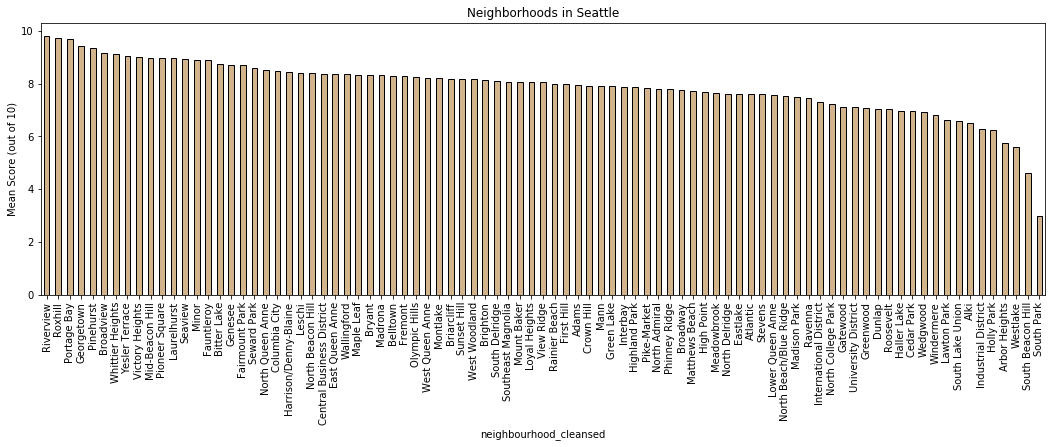

In [375]:
plt.figure(figsize=(18, 5));
#(listings6[['neighbourhood_cleansed','Overall_score']].groupby('neighbourhood_cleansed').sum()['Overall_score']/listings6.shape[0]).sort_values(ascending = True).plot.barh()

avg_score.plot(kind='bar', title='Average Total Review Score', color='tan', edgecolor='black')
plt.ylabel('Mean Score (out of 10)');
plt.title("Neighborhoods in Seattle")


> So, as per the reviews, the most popular or in other words highly reviewed neighborhood is Riverview, Roxhill and Portage Bay. All of these 3 is scoring more than 9.5 out of 10. <br>
Similarly, the least like neighborhoods are South Beacon Hill and South Park (both scoring less than 5)

Let's check the fluctuation in prices for the top and bottom most areas of Seattle

In [376]:
# Merging with cleaned listing dataset and calendar dataset
scores = listings6[['id','neighbourhood_cleansed','Overall_score']]

df_cal = calendar.copy()
df_cal = df_cal.rename(columns={'listing_id':'id'})

score_cal = scores.merge(df_cal, on='id', how='left')
score_cal.head()

,id,neighbourhood_cleansed,Overall_score,date,available,price,datemonth
0,241032,West Queen Anne,9.857143,2016-01-04,t,85.0,2016-01-01
1,241032,West Queen Anne,9.857143,2016-01-05,t,85.0,2016-01-01
2,241032,West Queen Anne,9.857143,2016-01-06,f,0.0,2016-01-01
3,241032,West Queen Anne,9.857143,2016-01-07,f,0.0,2016-01-01
4,241032,West Queen Anne,9.857143,2016-01-08,f,0.0,2016-01-01


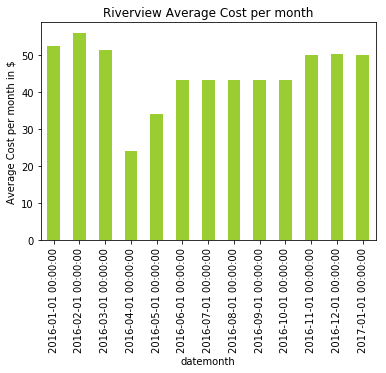

In [377]:
# Riverview

Area = score_cal[score_cal['neighbourhood_cleansed'] == 'Riverview']
riv_Avg_price = Area.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
riv_Avg_price.plot(kind='bar', color='yellowgreen', title='Riverview Average Cost per month');

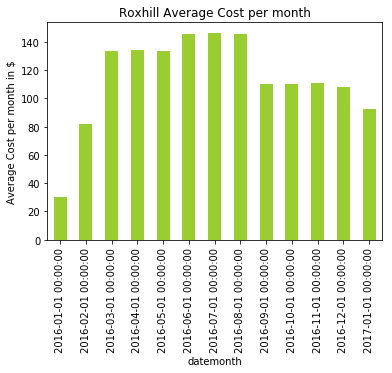

In [378]:
# Roxhill

Area = score_cal[score_cal['neighbourhood_cleansed'] == 'Roxhill']
rox_Avg_price = Area.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
rox_Avg_price.plot(kind='bar', color='yellowgreen', title='Roxhill Average Cost per month');

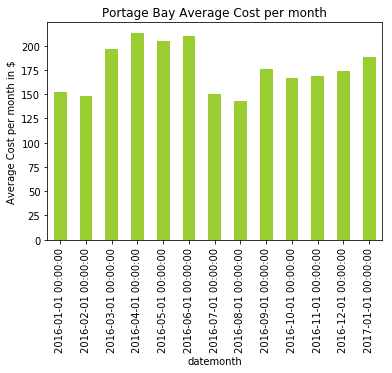

In [379]:
# Portage Bay

Area = score_cal[score_cal['neighbourhood_cleansed'] == 'Portage Bay']
port_Avg_price = Area.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
port_Avg_price.plot(kind='bar', color='yellowgreen', title='Portage Bay Average Cost per month');

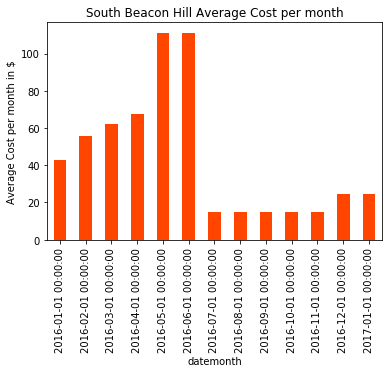

In [380]:
# South Beacon Hill

Area = score_cal[score_cal['neighbourhood_cleansed'] == 'South Beacon Hill']
beac_Avg_price = Area.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
beac_Avg_price.plot(kind='bar', color='orangered', title='South Beacon Hill Average Cost per month');

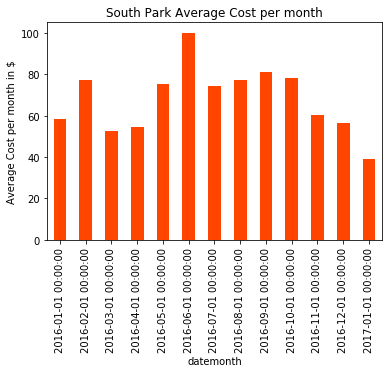

In [381]:
# South Park

Area = score_cal[score_cal['neighbourhood_cleansed'] == 'South Park']
spark_Avg_price = Area.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
spark_Avg_price.plot(kind='bar', color='orangered', title='South Park Average Cost per month');

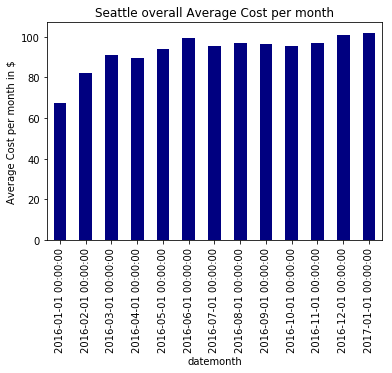

In [382]:
# Overall Seattle

All_Avg_price = score_cal.groupby('datemonth').mean().price

#Monthly price fluctuations of the most popularly reviewed area (Riverview)
plt.ylabel('Average Cost per month in $')
All_Avg_price.plot(kind='bar', color='navy', title='Seattle overall Average Cost per month');


<Figure size 360x720 with 0 Axes>

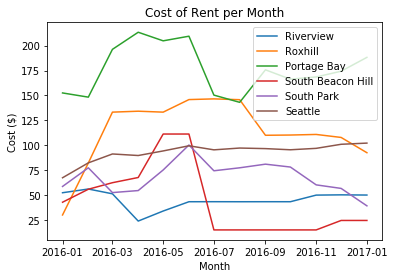

In [383]:
#plotting on the same plot

plt.figure(figsize=(5, 10));

fig, ax = plt.subplots()
plt.title('Cost of Rent per Month')
plt.ylabel('Cost ($)')
plt.xlabel('Month')
ax.plot(riv_Avg_price, label='Riverview')
ax.plot(rox_Avg_price, label='Roxhill')
ax.plot(port_Avg_price, label='Portage Bay')
ax.plot(beac_Avg_price, label='South Beacon Hill')
ax.plot(spark_Avg_price, label='South Park')
ax.plot(All_Avg_price, label='Seattle')
plt.legend()

Let's check how many properties are there in each of the neighborhood

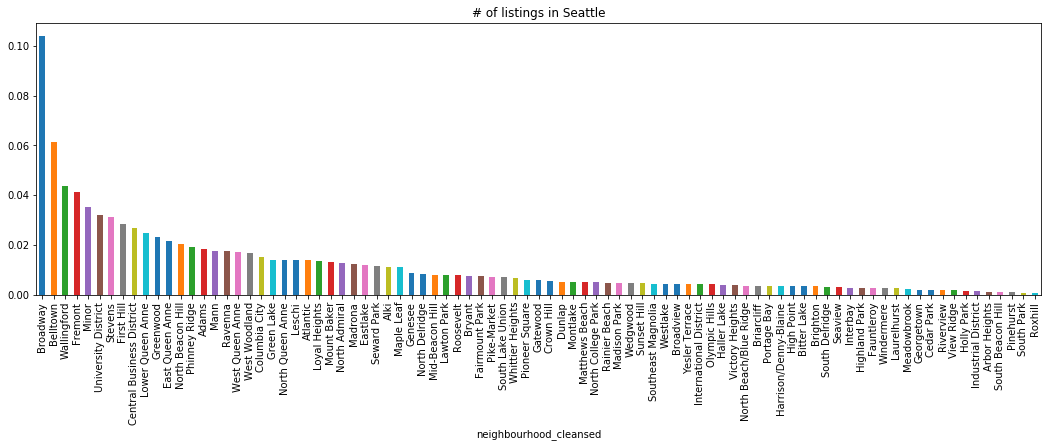

In [384]:
plt.figure(figsize=(18, 5));
(listings6[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').count()['price']/listings6.shape[0]).sort_values(ascending = False).plot.bar()

plt.title("# of listings in Seattle");

In [385]:
top_listings = (listings6[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').count()['price']/listings6.shape[0]).sort_values(ascending = False)
top_listings = pd.DataFrame(top_listings)

top_listings.reset_index(inplace=True)

In [386]:
top_listings.iloc[:5,0:].sum()

neighbourhood_cleansed    BroadwayBelltownWallingfordFremontMinor
price                                                    0.285752
dtype: object

In [387]:
Top_5_area = list(top_listings.iloc[:5,0])
Top_5_area

['Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor']

In [388]:
top_listings.iloc[:10,0:].sum()

neighbourhood_cleansed    BroadwayBelltownWallingfordFremontMinorUnivers...
price                                                              0.428759
dtype: object

In [389]:
Top_10_area = list(top_listings.iloc[:10,0])
Top_10_area

['Broadway',
 'Belltown',
 'Wallingford',
 'Fremont',
 'Minor',
 'University District',
 'Stevens',
 'First Hill',
 'Central Business District',
 'Lower Queen Anne']

#### Observations
1. The rating incorporates each users review of accuracy, cleanliness, checkin, communication, location and value for the airbnb rooms. We can see that the top most popular neighborhood is Riverview, Roxhill and Portage Bay (each of them scoring on an avergae higher than 9.5). The bottom most neighborhood was found to be South Beacon Hill and South Park (each socring less than 5 on an average)
2. We then looked at the average price of rent per month for all the 5 standout neighborhoods found. The overall rent trend of Seattle was almost a straight line without dips and spike. However, for other 5 neighborhoods we saw some actual trends and interesting observation
3. For bottom most neighborhood, South Beacon Hill and South Park were having prices below the overall Seattle average. While for top most neighborhood prices were trending above the overall Seattle average price
4. The exception was the top most popular neighborhood - Riverview. It had among the lowest average prices per rent per month
5. These neighborhood showed some kind of spike in the summer month

Top listings
1. The top 5 neighborhoods contribute to around 28% of overall Seattle while top 10 contributes to around 43%
2. Most popular neighborhoods like Riverview, Roxhill and portage Bay doesn't have very high listings. Same is the case with bottom most neighborhoods wrt average scores of ratings




> We will now check what are the important amenities and what affects prices of the lisitngs

In [390]:
listings6.shape

(3818, 63)

In [391]:
listings7 = listings6.copy()

In [392]:
listings7.head()

,neighbourhood_group_cleansed,latitude,longitude,property_type,bed_type,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,id,Overall_score,flexible,moderate,strict,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""","""Hair Dryer""","""Indoor Fireplace""","""Laptop Friendly Workspace""","""Pets Allowed""","""Pets live on this property""","""Safety Card""","""Smoke Detector""","""Wireless Internet""",Dog(s),Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Shampoo,TV,Washer
0,Queen Anne,47.636289,-122.371025,Apartment,Real Bed,within a few hours,96.0,100.0,0,West Queen Anne,Entire home/apt,4,1.0,1.0,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",85.0,1,moderate,0,0,241032,9.857143,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1
1,Queen Anne,47.639123,-122.365666,Apartment,Real Bed,within an hour,98.0,100.0,1,West Queen Anne,Entire home/apt,4,1.0,1.0,"TV,Internet,""Wireless Internet"",Kitchen,""Free ...",150.0,2,strict,1,1,953595,10.000000,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,1,1
2,Queen Anne,47.629724,-122.369483,House,Real Bed,within a few hours,67.0,100.0,0,West Queen Anne,Entire home/apt,11,4.5,5.0,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",975.0,4,strict,0,0,3308979,10.000000,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,1
3,Queen Anne,47.638473,-122.369279,Apartment,Real Bed,0,0.0,0.0,0,West Queen Anne,Entire home/apt,3,1.0,0.0,"Internet,""Wireless Internet"",Kitchen,""Indoor F...",100.0,1,flexible,0,0,7421966,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1
4,Queen Anne,47.632918,-122.372471,House,Real Bed,within an hour,100.0,0.0,0,West Queen Anne,Entire home/apt,6,2.0,3.0,"TV,""Cable TV"",Internet,""Wireless Internet"",Kit...",450.0,1,strict,0,0,278830,9.285714,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0


In [393]:
price_target = listings7['price']
listings7.drop(['price', 'cancellation_policy', 'room_type', 'amenities','property_type','bed_type',
                'neighbourhood_group_cleansed','neighbourhood_cleansed','host_response_time', ], axis=1, inplace=True)

In [394]:
# Normalization using MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights', 'Overall_score']

#listings7[numerical] = scaler.fit_transform(listings7[numerical])
listings8 = pd.DataFrame(scaler.fit_transform(listings7))


In [395]:
listings7.shape # has proper column names

(3818, 54)

In [396]:
listings8.shape # has column names as number

(3818, 54)

In [397]:
# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(listings8, price_target, test_size = 0.2, random_state = 42)

In [398]:
print("Training set size {}".format(X_train.shape[0]))
print("Testing set size {}".format(X_test.shape[0]))

Training set size 3054
Testing set size 764


In [399]:
# Grid Search to find the best parameters

param_grid = {'n_estimators': [100, 200],
              'learning_rate' : [0.05,0.1],
              'loss': ['linear', 'square']
             }

adaboost_regressor = AdaBoostRegressor(random_state=42)

grid_search_cv = GridSearchCV(adaboost_regressor, param_grid=param_grid, cv=5,
                             scoring='neg_mean_squared_error', return_train_score=True)

In [400]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'loss': ['linear', 'square']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [401]:
grid_search_cv.best_params_

{'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100}

In [402]:
results = grid_search_cv.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)

66.94188674943331 {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}
66.61863474202936 {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 200}
68.58655434405763 {'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 100}
67.12724263696195 {'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 200}
66.99811330972258 {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
68.24891516624547 {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 200}
66.46137593453875 {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100}
66.94412928949653 {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 200}


#### Evaluation

In [403]:
y_pred = grid_search_cv.predict(X_test)
print("Error on Test Data: {0:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Error on Test Data: 62.04


#### Check what drives the price of the listings

In [404]:
# Feature Importance
feature_importances = grid_search_cv.best_estimator_.feature_importances_

In [405]:
feature_importances1 = sorted(zip(feature_importances, listings7.columns), reverse=True)
#feature_importances1

In [406]:
features, coefficients = [], []
for feature in feature_importances1:
    features.append(feature[1])
    coefficients.append(feature[0])

In [407]:
feature_importance_df = pd.DataFrame(columns=['feature', 'coefficients'])
feature_importance_df['feature'] = pd.Series(features)
feature_importance_df['coefficients'] = pd.Series(coefficients)

In [408]:
feature_importance_df.sort_values(by=['coefficients'],ascending=False, inplace=True)
feature_importance_df.index = feature_importance_df['feature']

<Figure size 720x360 with 0 Axes>

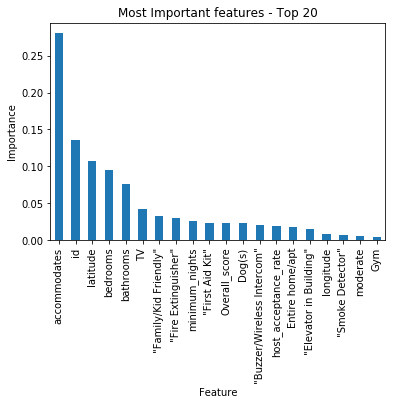

In [409]:
plt.figure(figsize=(10,5));
feature_importance_df[:20].plot(kind='bar', legend=False);
plt.xlabel('Feature');
plt.ylabel('Importance');
plt.title('Most Important features - Top 20');
plt.show();

#### Check what amenities are best for the listings

In [410]:
all_amenities = amenities_temp["index"].unique()

In [411]:
# Amenity importance

amenities, coefficients = [], []
for feature in feature_importances1:
    if feature[1] in all_amenities:
        amenities.append(feature[1])
        coefficients.append(feature[0])
        

In [412]:
amenity_importance_df = pd.DataFrame(columns=['amenity', 'coefficients'])
amenity_importance_df['amenity'] = pd.Series(amenities)
amenity_importance_df['coefficients'] = pd.Series(coefficients)

amenity_importance_df.sort_values(by=['coefficients'],ascending=False, inplace=True)
amenity_importance_df.index = amenity_importance_df['amenity']

<Figure size 720x360 with 0 Axes>

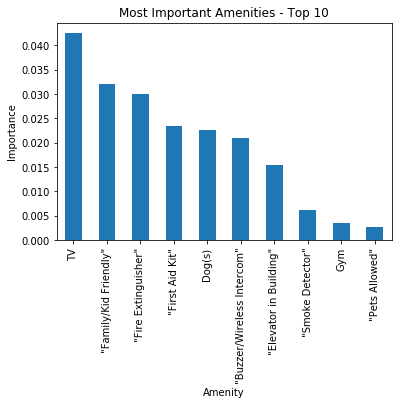

In [413]:
plt.figure(figsize=(10,5));
amenity_importance_df[:10].plot(kind='bar', legend=False);
plt.xlabel('Amenity');
plt.ylabel('Importance');
plt.title('Most Important Amenities - Top 10');
plt.xticks(rotation=90);
plt.show();

### Conclusion

Through this article we went through Seattle Airbnb dataset and some visualizations to understand what are the major popular areas in Seattle are. We also understood the following:
1.	Most popular may not be holding many properties for rent
2.	Average prices per properties are trending upward
3.	Better rated neighborhood have average prices higher than that of Seattle, probably better amenities are being provided
4.	Amenities such as TV, family friendliness, fire extinguisher are driving reasons for higher prices
